In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

In [55]:
df=pd.read_csv("/home/pravn/Dropbox/Masters/galah-test-nut/best_emission_candidates_spectra_labels.csv")

In [56]:
df.head()

sobject_id      1475      1476      1477      1478      1479  \
0  131116000501262  0.791232  0.799116  0.798513  0.789936  0.770570   
1  131116001001379  1.016790  1.033717  1.039141  1.053989  1.071330   
2  131118002401234  1.068419  1.064418  1.059543  1.045539  1.045996   
3  131118002401396  0.854523  0.876311  0.909512  0.926363  0.935885   
4  131118002901052  0.958085  0.961354  0.958334  0.960897  0.960540   

       1480      1481      1482      1483  ...      1541      1542      1543  \
0  0.747840  0.750200  0.778579  0.805557  ...  0.787328  0.786379  0.795869   
1  1.068635  1.053506  1.034933  1.029725  ...  1.066814  1.051114  1.045202   
2  1.074062  1.101389  1.097221  1.074829  ...  0.948488  0.951768  0.963281   
3  0.954685  0.921646  0.926053  0.934858  ...  0.952184  0.955382  0.951590   
4  0.954966  0.951380  0.939908  0.923267  ...  0.925107  0.934469  0.943445   

       1544      1545      1546      1547      1548      1549  label  
0  0.800229  0.788336  0.781923  0.799863  0.835885  0.842837      1  
1  1.061199  1.052639  1.056661  1.036873  1.035144  1.027276      2  
2  0.994941  1.033656  1.060059  1.077753  1.082559  1.075347      4  
3  0.953749  0.961062  0.973229  0.988212  0.976314  0.969340      2  
4  0.949600  0.948857  0.944906  0.948702  0.955197  0.953001      2  

[5 rows x 77 columns]

In [57]:
first_column = df.pop("label")


In [58]:
df.insert(0, "label", first_column)

In [59]:
df.head()

label       sobject_id      1475      1476      1477      1478      1479  \
0      1  131116000501262  0.791232  0.799116  0.798513  0.789936  0.770570   
1      2  131116001001379  1.016790  1.033717  1.039141  1.053989  1.071330   
2      4  131118002401234  1.068419  1.064418  1.059543  1.045539  1.045996   
3      2  131118002401396  0.854523  0.876311  0.909512  0.926363  0.935885   
4      2  131118002901052  0.958085  0.961354  0.958334  0.960897  0.960540   

       1480      1481      1482  ...      1540      1541      1542      1543  \
0  0.747840  0.750200  0.778579  ...  0.798908  0.787328  0.786379  0.795869   
1  1.068635  1.053506  1.034933  ...  1.059578  1.066814  1.051114  1.045202   
2  1.074062  1.101389  1.097221  ...  0.956748  0.948488  0.951768  0.963281   
3  0.954685  0.921646  0.926053  ...  0.945860  0.952184  0.955382  0.951590   
4  0.954966  0.951380  0.939908  ...  0.920758  0.925107  0.934469  0.943445   

       1544      1545      1546      1547      1548      1549  
0  0.800229  0.788336  0.781923  0.799863  0.835885  0.842837  
1  1.061199  1.052639  1.056661  1.036873  1.035144  1.027276  
2  0.994941  1.033656  1.060059  1.077753  1.082559  1.075347  
3  0.953749  0.961062  0.973229  0.988212  0.976314  0.969340  
4  0.949600  0.948857  0.944906  0.948702  0.955197  0.953001  

[5 rows x 77 columns]

In [54]:
df_data = df.iloc[:,2:]

In [24]:
df_data.head()

1475      1476      1477      1478      1479      1480      1481  \
0  0.791232  0.799116  0.798513  0.789936  0.770570  0.747840  0.750200   
1  1.016790  1.033717  1.039141  1.053989  1.071330  1.068635  1.053506   
2  1.068419  1.064418  1.059543  1.045539  1.045996  1.074062  1.101389   
3  0.854523  0.876311  0.909512  0.926363  0.935885  0.954685  0.921646   
4  0.958085  0.961354  0.958334  0.960897  0.960540  0.954966  0.951380   

       1482      1483      1484  ...      1540      1541      1542      1543  \
0  0.778579  0.805557  0.818449  ...  0.798908  0.787328  0.786379  0.795869   
1  1.034933  1.029725  1.013231  ...  1.059578  1.066814  1.051114  1.045202   
2  1.097221  1.074829  1.057252  ...  0.956748  0.948488  0.951768  0.963281   
3  0.926053  0.934858  0.936088  ...  0.945860  0.952184  0.955382  0.951590   
4  0.939908  0.923267  0.903025  ...  0.920758  0.925107  0.934469  0.943445   

       1544      1545      1546      1547      1548      1549  
0  0.800229  0.788336  0.781923  0.799863  0.835885  0.842837  
1  1.061199  1.052639  1.056661  1.036873  1.035144  1.027276  
2  0.994941  1.033656  1.060059  1.077753  1.082559  1.075347  
3  0.953749  0.961062  0.973229  0.988212  0.976314  0.969340  
4  0.949600  0.948857  0.944906  0.948702  0.955197  0.953001  

[5 rows x 75 columns]

In [25]:
df_data.to_csv("best_emission_candidates_spectra_data.csv")

In [31]:
df2 = pd.read_csv("best_emission_candidates_spectra_data.csv",index_col=0)

In [32]:
df2.head()

1475      1476      1477      1478      1479      1480      1481  \
0  0.791232  0.799116  0.798513  0.789936  0.770570  0.747840  0.750200   
1  1.016790  1.033717  1.039141  1.053989  1.071330  1.068635  1.053506   
2  1.068419  1.064418  1.059543  1.045539  1.045996  1.074062  1.101389   
3  0.854523  0.876311  0.909512  0.926363  0.935885  0.954685  0.921646   
4  0.958085  0.961354  0.958334  0.960897  0.960540  0.954966  0.951380   

       1482      1483      1484  ...      1540      1541      1542      1543  \
0  0.778579  0.805557  0.818449  ...  0.798908  0.787328  0.786379  0.795869   
1  1.034933  1.029725  1.013231  ...  1.059578  1.066814  1.051114  1.045202   
2  1.097221  1.074829  1.057252  ...  0.956748  0.948488  0.951768  0.963281   
3  0.926053  0.934858  0.936088  ...  0.945860  0.952184  0.955382  0.951590   
4  0.939908  0.923267  0.903025  ...  0.920758  0.925107  0.934469  0.943445   

       1544      1545      1546      1547      1548      1549  
0  0.800229  0.788336  0.781923  0.799863  0.835885  0.842837  
1  1.061199  1.052639  1.056661  1.036873  1.035144  1.027276  
2  0.994941  1.033656  1.060059  1.077753  1.082559  1.075347  
3  0.953749  0.961062  0.973229  0.988212  0.976314  0.969340  
4  0.949600  0.948857  0.944906  0.948702  0.955197  0.953001  

[5 rows x 75 columns]

In [34]:
df2_np = df2.to_numpy()

In [108]:
#embeddings = TSNE(n_components=2,perplexity=30).fit_transform(df2_np)
embeddings = TSNE(n_components=2,perplexity=50).fit_transform(df2_np)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

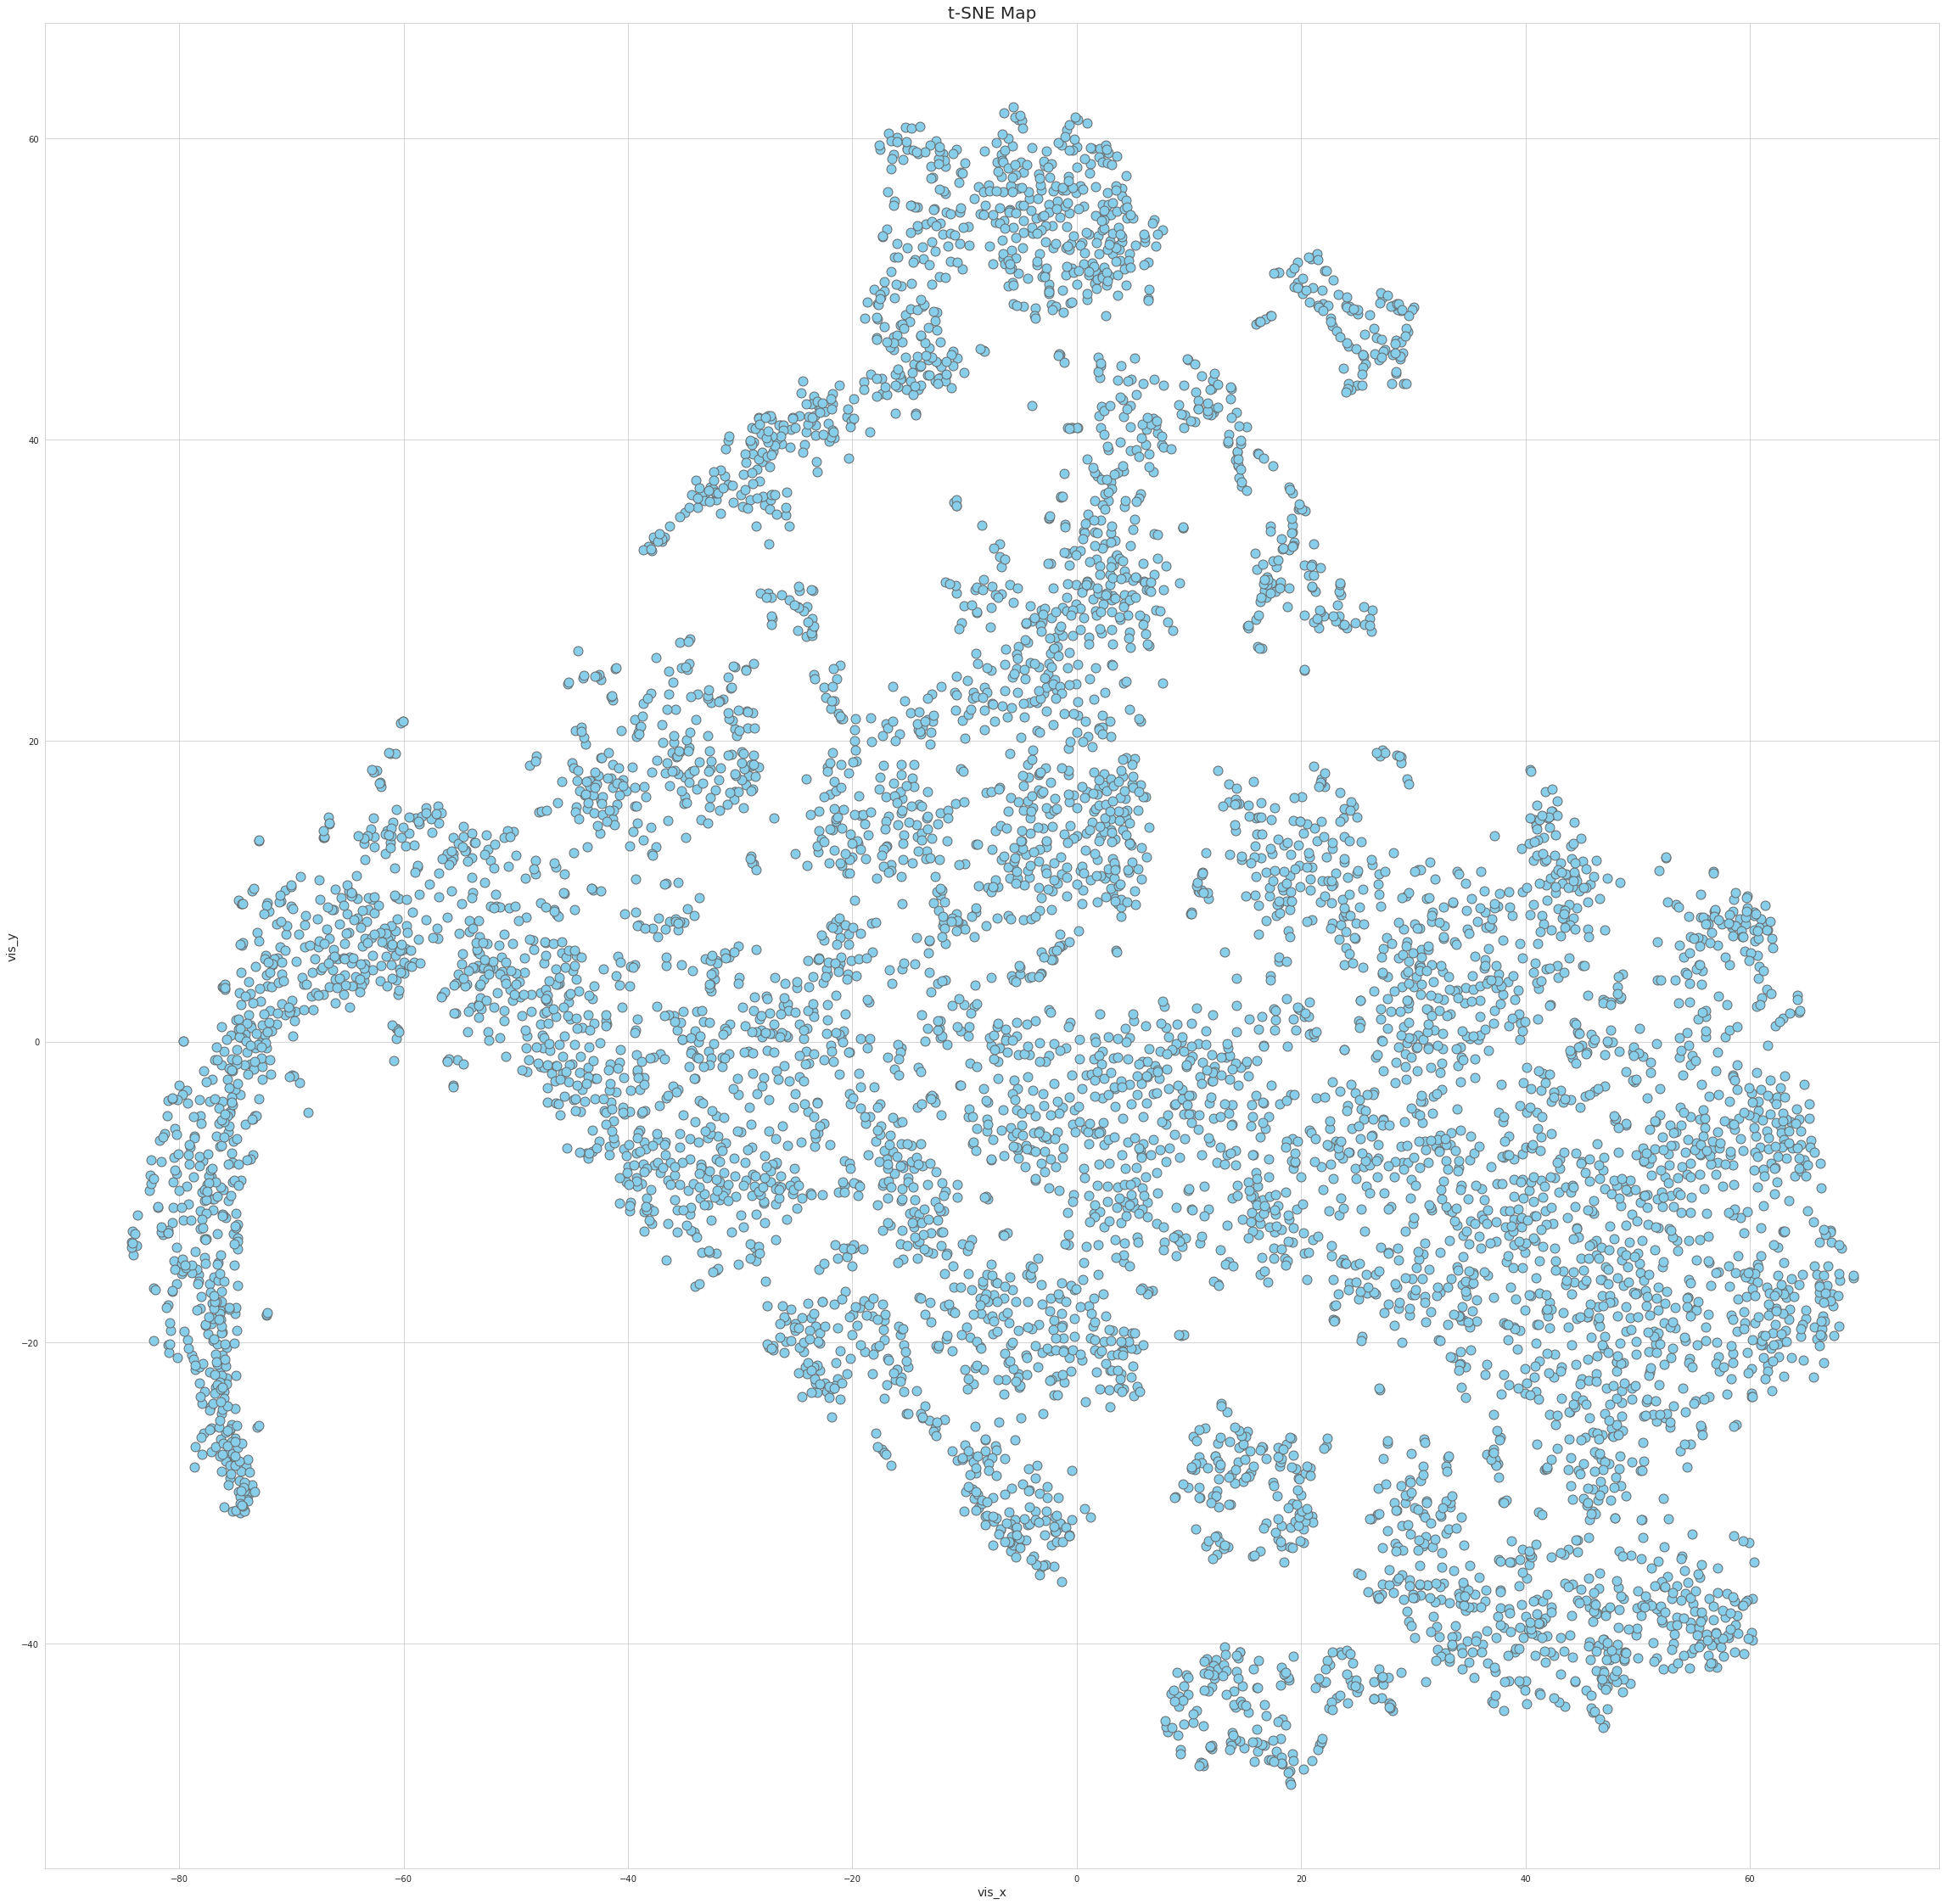

In [109]:
plt.figure(figsize=(40,40))
plt.scatter(vis_x,vis_y, color = 'skyblue', alpha = 1, edgecolors = 'dimgray', s=120)
plt.title('t-SNE Map',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.show()

In [110]:
embeddings_x_y = pd.DataFrame({'vis_x': vis_x, 'vis_y': vis_y}, columns=['vis_x', 'vis_y'])

In [111]:
vis_x

array([ 41.80157  , -57.736225 , -74.82178  , ...,  26.937933 ,
        33.46876  ,  -6.0268955], dtype=float32)

In [112]:
vis_y

array([-17.885376,  10.457235, -12.146535, ..., -23.022573, -30.16547 ,
       -18.69964 ], dtype=float32)

In [113]:
embeddings_x_y.head()

vis_x      vis_y
0  41.801571 -17.885376
1 -57.736225  10.457235
2 -74.821777 -12.146535
3 -24.693390  -2.344676
4 -20.753433  -9.569548

In [114]:
embeddings_x_y["label"]=df["label"]

In [115]:
embeddings_x_y.head()

vis_x      vis_y  label
0  41.801571 -17.885376      1
1 -57.736225  10.457235      2
2 -74.821777 -12.146535      4
3 -24.693390  -2.344676      2
4 -20.753433  -9.569548      2

In [116]:
embeddings_x_y["label"].value_counts()

1    3000
2    1848
3    1430
4     423
8     102
6      99
9      63
0       7
7       4
5       1
Name: label, dtype: int64

In [117]:
embeddings_x_y["label"].dtype

dtype('int64')

In [118]:
embeddings_x_y["label_str"] = embeddings_x_y["label"].apply(str)

In [119]:
embeddings_x_y["label_str"].dtype

dtype('O')

In [120]:
embeddings_x_y["label"].value_counts()

1    3000
2    1848
3    1430
4     423
8     102
6      99
9      63
0       7
7       4
5       1
Name: label, dtype: int64

In [121]:
embeddings_x_y["label"].dtype

dtype('int64')

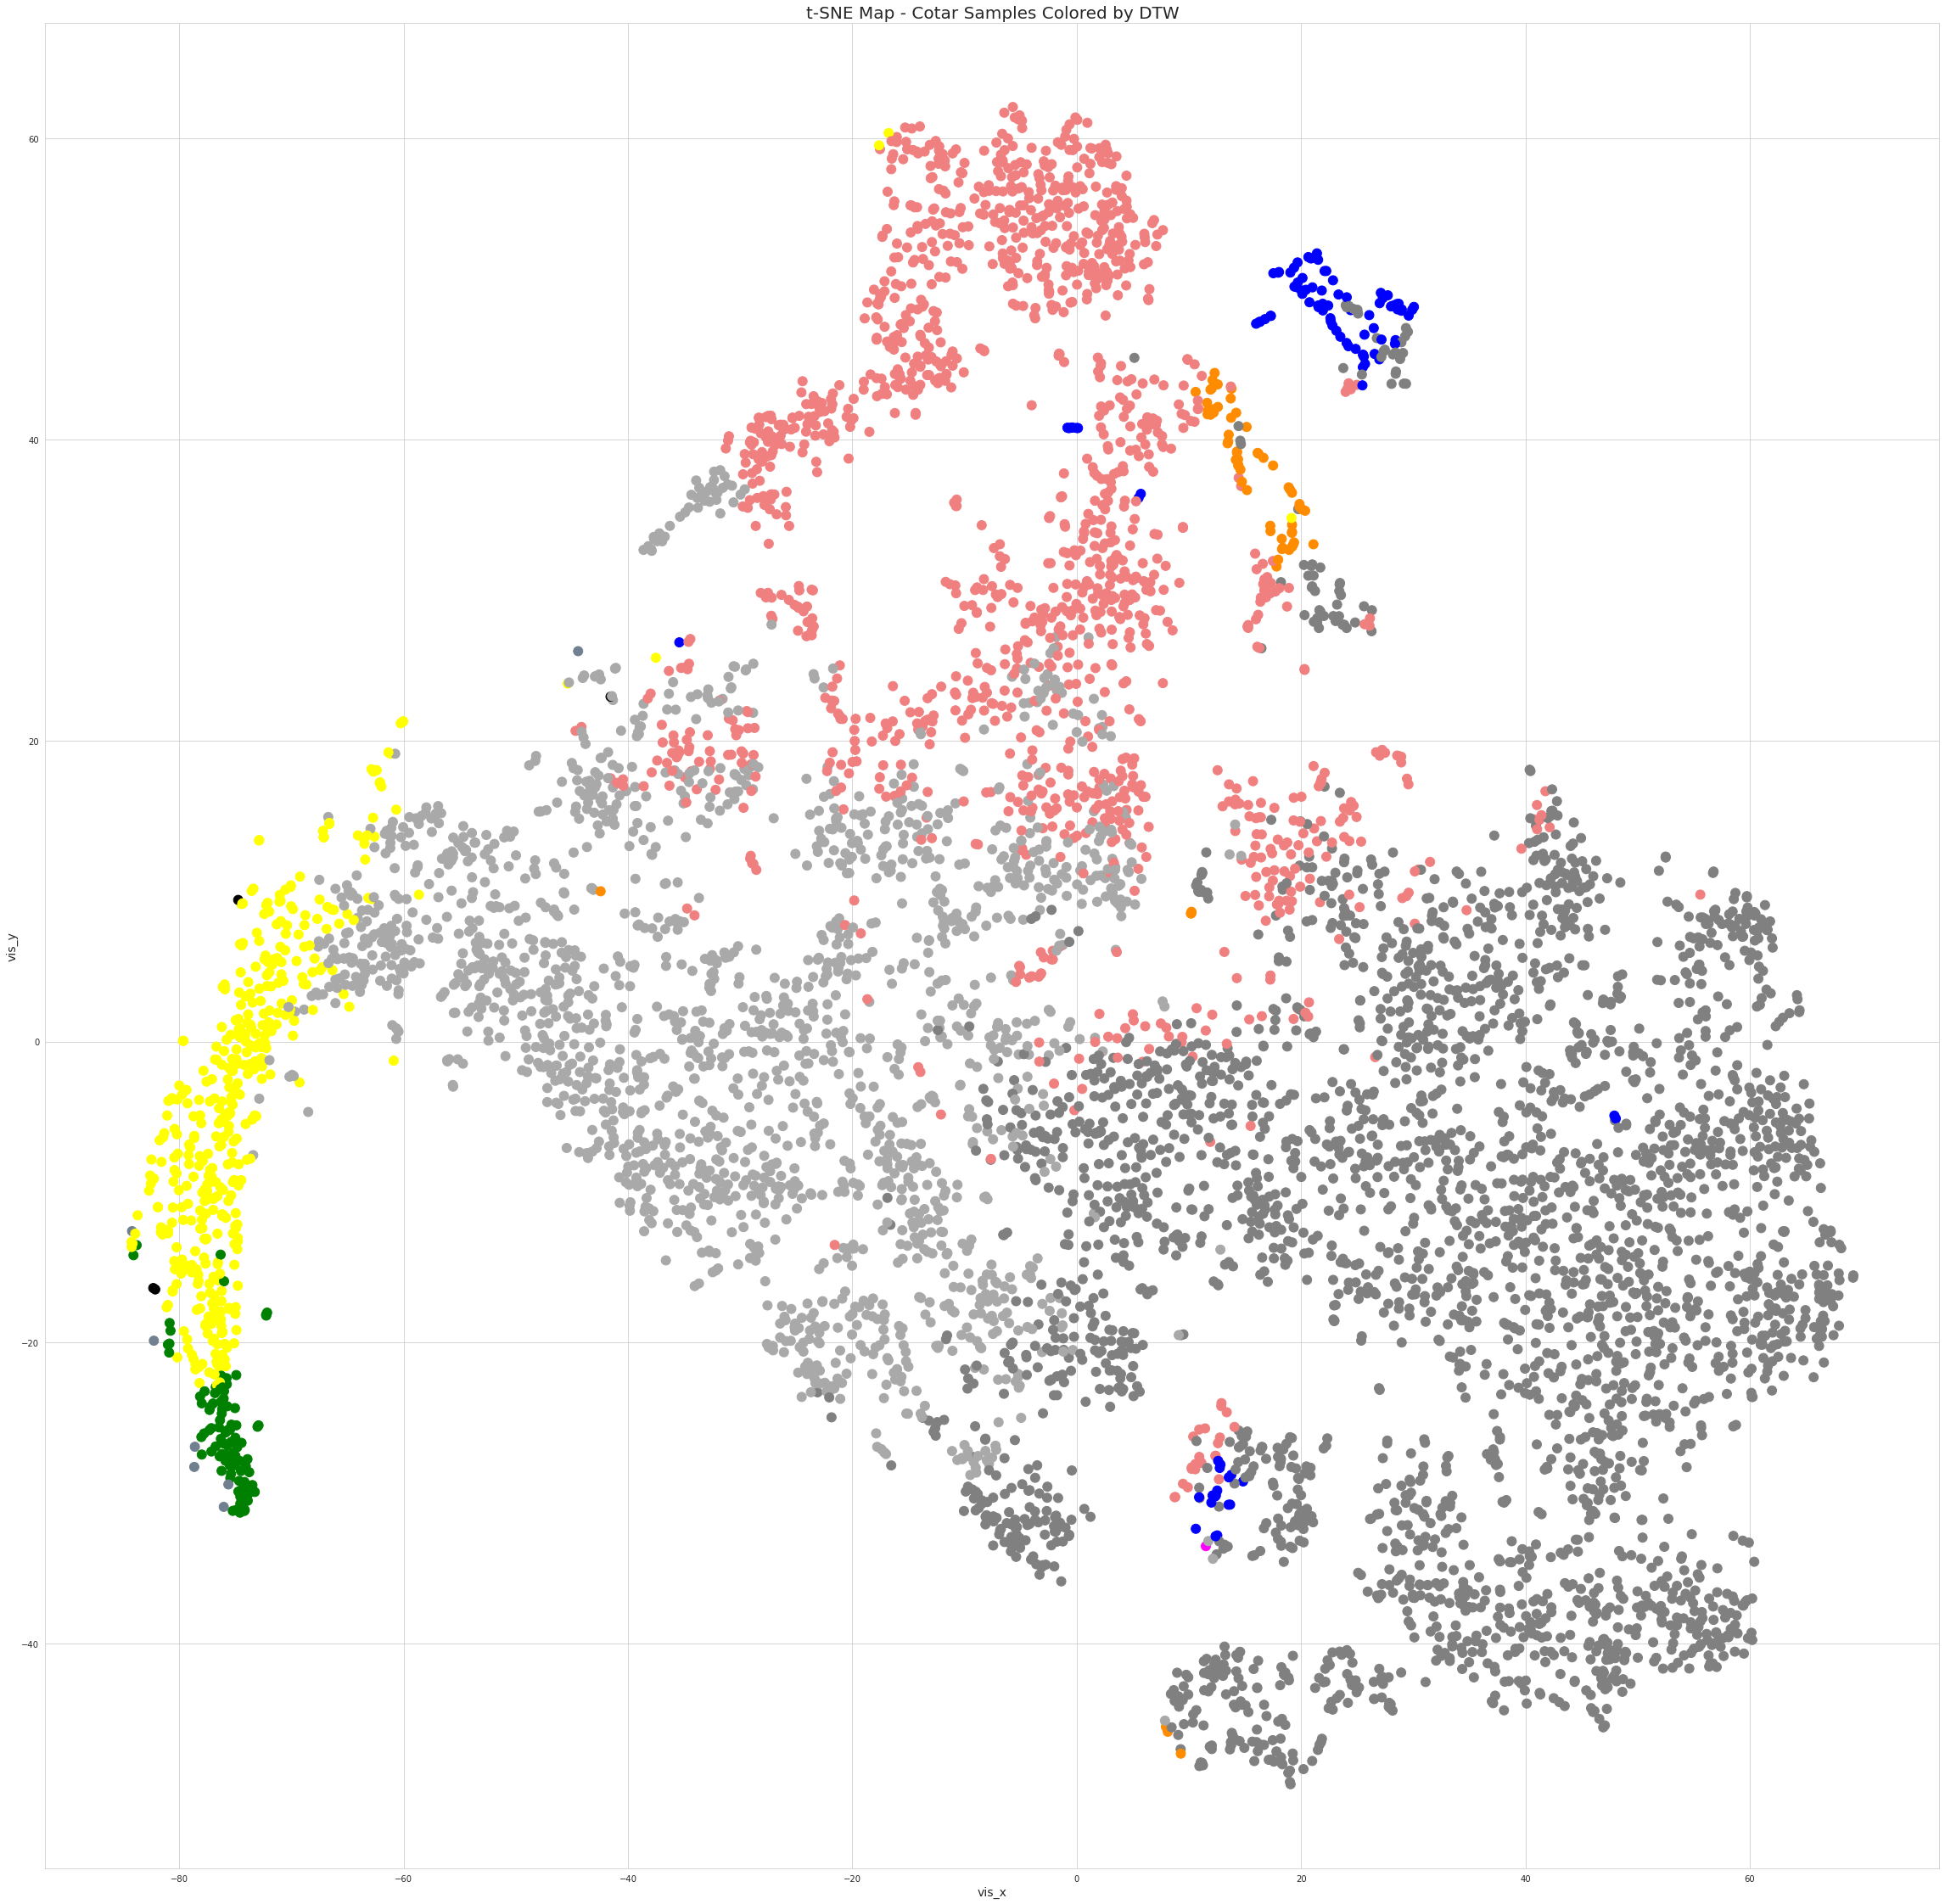

In [122]:
colors = {'9':'darkorange', '8':'blue','7':'black','6':'green','5':'fuchsia','4':'yellow','3':'lightcoral','2':'darkgray','1':'gray','0':'slategrey'}
plt.figure(figsize=(40,40))
plt.scatter(embeddings_x_y["vis_x"],embeddings_x_y["vis_y"], color = embeddings_x_y["label_str"].map(colors), alpha = 1, s=120)
plt.title('t-SNE Map - Cotar Samples Colored by DTW',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.show()

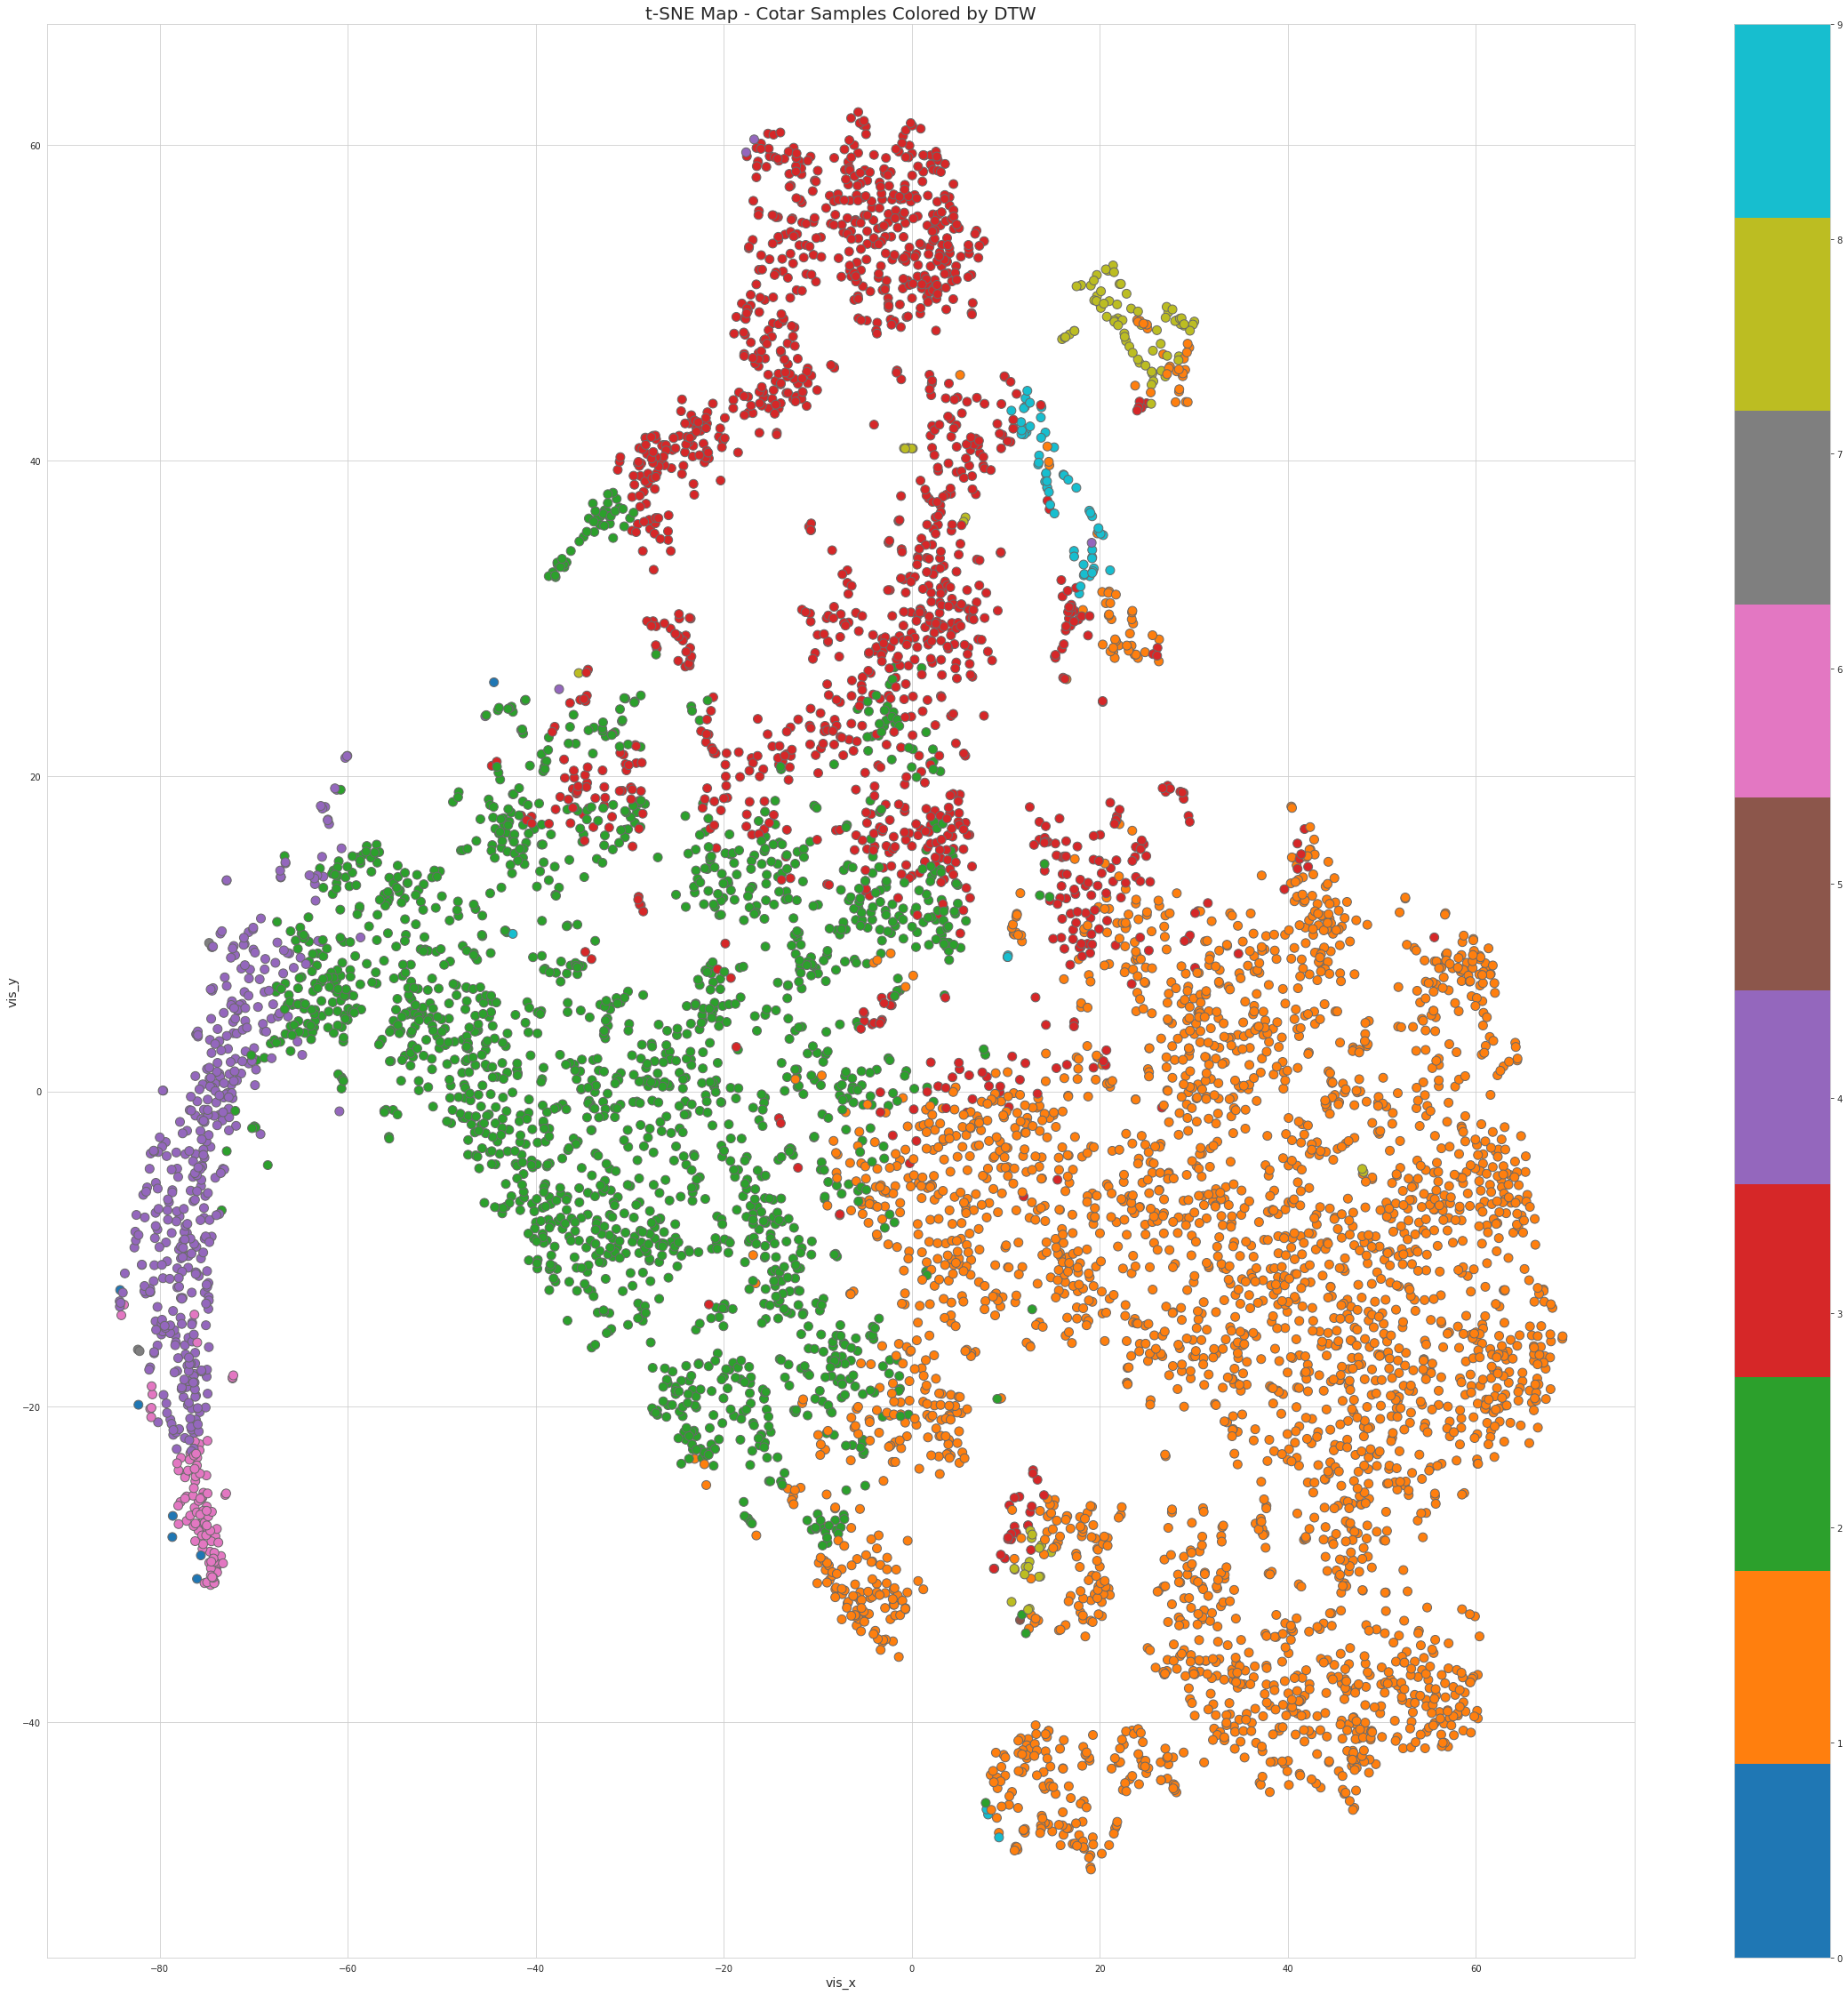

In [123]:
plt.figure(figsize=(40,40))
plt.scatter(embeddings_x_y["vis_x"],embeddings_x_y["vis_y"], c = embeddings_x_y["label"], cmap='tab10', edgecolors = 'dimgray', alpha = 1, s=100)
plt.title('t-SNE Map - Cotar Samples Colored by DTW',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.colorbar()
plt.show()